In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [63]:
articles = pd.read_csv('estimated-article-influence-scores-2015.csv')
journals = pd.read_csv('journals_out.csv')
price = pd.read_csv('price.csv')

In [3]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   indx                 3615 non-null   int64  
 1   journal_name         3615 non-null   object 
 2   issn                 3615 non-null   object 
 3   citation_count_sum   3603 non-null   float64
 4   paper_count_sum      3603 non-null   float64
 5   avg_cites_per_paper  3603 non-null   float64
 6   proj_ai              3603 non-null   float64
 7   proj_ai_year         3615 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 226.1+ KB


# Cleaning Articles Data

In [6]:
# Dropping indx which is an extra column
# Dropping issn which is a paper ID and has no meaning since we already have the paper name

In [7]:
articles = articles.drop(['indx','issn'], axis = 1)

In [8]:
articles.describe()

,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
count,3603.000000,3603.000000,3603.000000,3603.000000,3615.0
mean,1446.713850,509.671107,2.118970,0.516554,2015.0
std,7996.860704,1923.905084,1.687837,0.572554,0.0
min,0.000000,1.000000,0.000000,0.000000,2015.0
25%,150.000000,107.000000,1.054941,0.199000,2015.0
50%,421.000000,239.000000,1.717822,0.367000,2015.0
75%,1097.000000,522.000000,2.710734,0.651500,2015.0
max,426949.000000,104705.000000,26.318824,11.367000,2015.0


In [9]:
articles.head(5)

,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
0,3d research,151.0,106.0,1.424528,0.290,2015
1,aaps pharmscitech,2208.0,801.0,2.756554,0.665,2015
2,abstract and applied analysis,3005.0,2923.0,1.028053,0.192,2015
3,academic psychiatry,537.0,490.0,1.095918,0.208,2015
4,academic questions,40.0,67.0,0.597015,0.097,2015


In [10]:
cols = ['citation_count_sum', 'paper_count_sum',
       'avg_cites_per_paper', 'proj_ai']

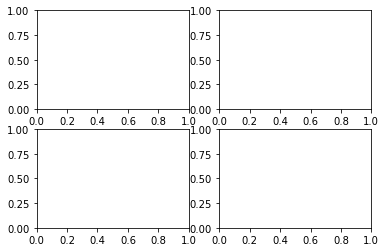

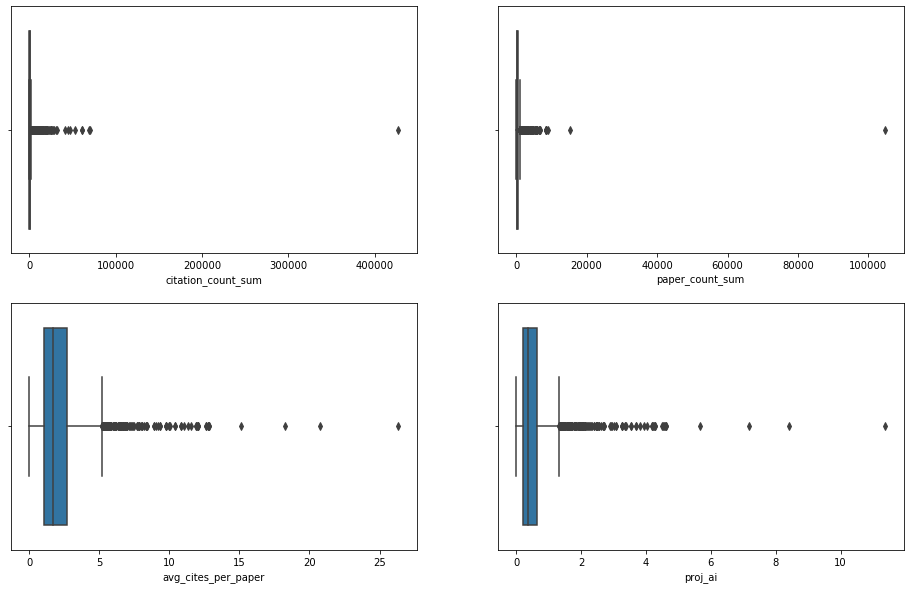

In [11]:
plt.subplots(2, 2)
plt.figure(figsize=(16,10))

for i,col in enumerate(cols):
    plt.subplot(int('22'+str(i+1)))
    sns.boxplot(x=articles[col])

### Dropping the outlier

In [12]:
articles[articles['citation_count_sum'] == max(articles['citation_count_sum'])]

,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
2924,plos one,426949.0,104705.0,4.077637,1.089,2015


In [13]:
articles = articles.drop(2924)

In [14]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3614 entries, 0 to 3614
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   journal_name         3614 non-null   object 
 1   citation_count_sum   3602 non-null   float64
 2   paper_count_sum      3602 non-null   float64
 3   avg_cites_per_paper  3602 non-null   float64
 4   proj_ai              3602 non-null   float64
 5   proj_ai_year         3614 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 197.6+ KB


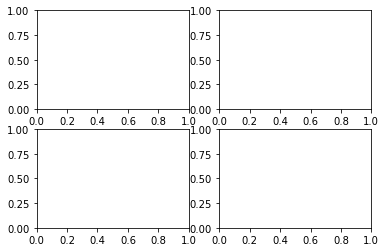

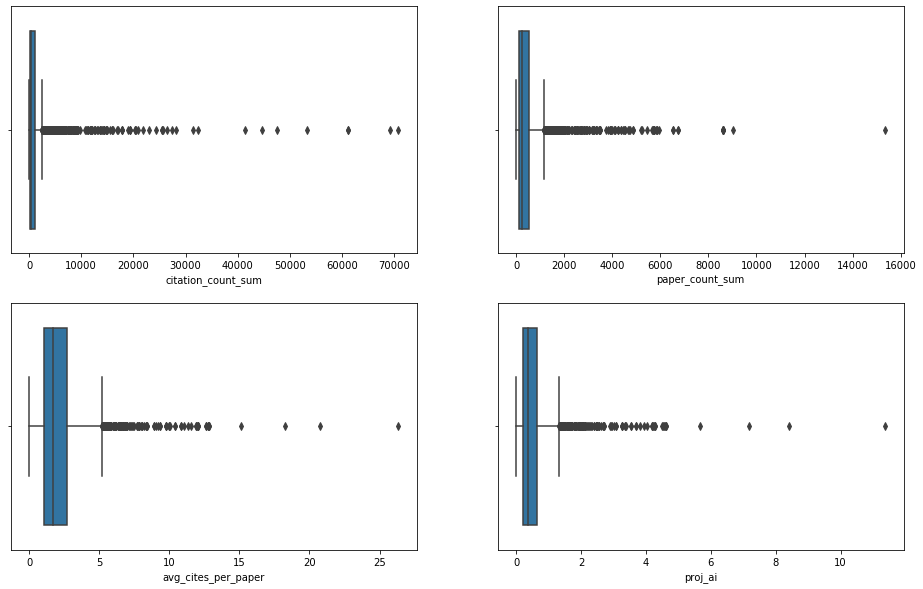

In [15]:
plt.subplots(2, 2)
plt.figure(figsize=(16,10))

for i,col in enumerate(cols):
    plt.subplot(int('22'+str(i+1)))
    sns.boxplot(x=articles[col])

### Dropping more outliers

In [16]:
for i,num in enumerate(articles['citation_count_sum']):
    if num>= 1000:
        articles.drop((articles[articles['citation_count_sum'] == num]).index, inplace= True)

In [17]:
for i,num in enumerate(articles['avg_cites_per_paper']):
    if num>= 3.9:
        articles.drop((articles[articles['avg_cites_per_paper'] == num]).index, inplace= True)

In [18]:
for i,num in enumerate(articles['proj_ai']):
    if num>= 0.88:
        articles.drop((articles[articles['proj_ai'] == num]).index, inplace= True)

In [19]:
for i,num in enumerate(articles['paper_count_sum']):
    if num>= 550:
        articles.drop((articles[articles['paper_count_sum'] == num]).index, inplace= True)

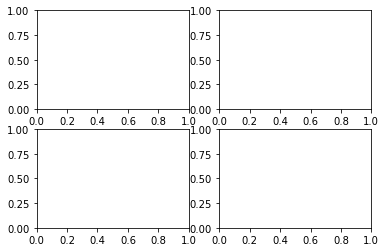

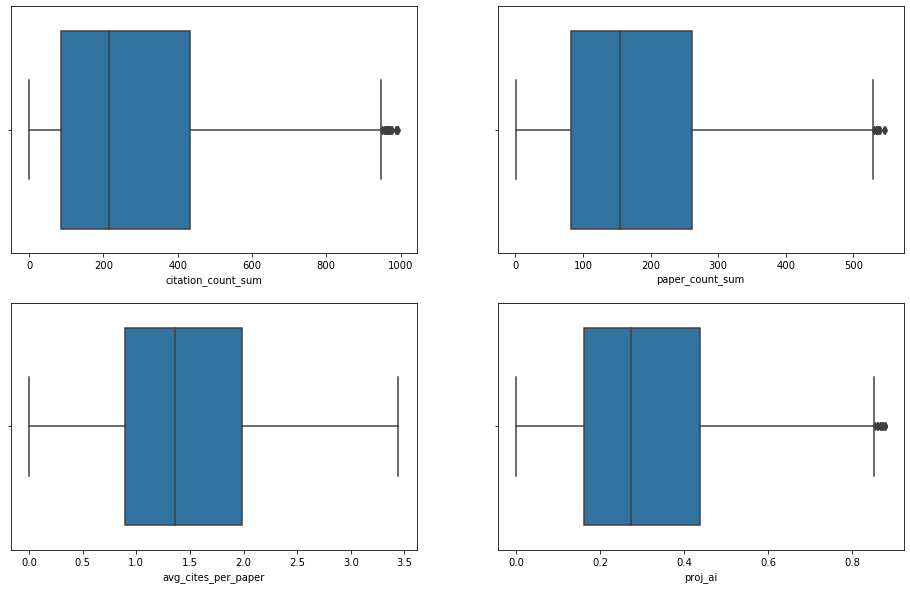

In [20]:
plt.subplots(2, 2)
plt.figure(figsize=(16,10))

for i,col in enumerate(cols):
    plt.subplot(int('22'+str(i+1)))
    sns.boxplot(x=articles[col])

In [21]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 3614
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   journal_name         2373 non-null   object 
 1   citation_count_sum   2361 non-null   float64
 2   paper_count_sum      2361 non-null   float64
 3   avg_cites_per_paper  2361 non-null   float64
 4   proj_ai              2361 non-null   float64
 5   proj_ai_year         2373 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 129.8+ KB


### Handling NaN

In [22]:
for col in cols:
    if articles[col].isna().sum() != 0:
        articles[col].fillna(articles[col].mean(), inplace= True)

# Cleaned Articles Data

<Figure size 864x576 with 0 Axes>

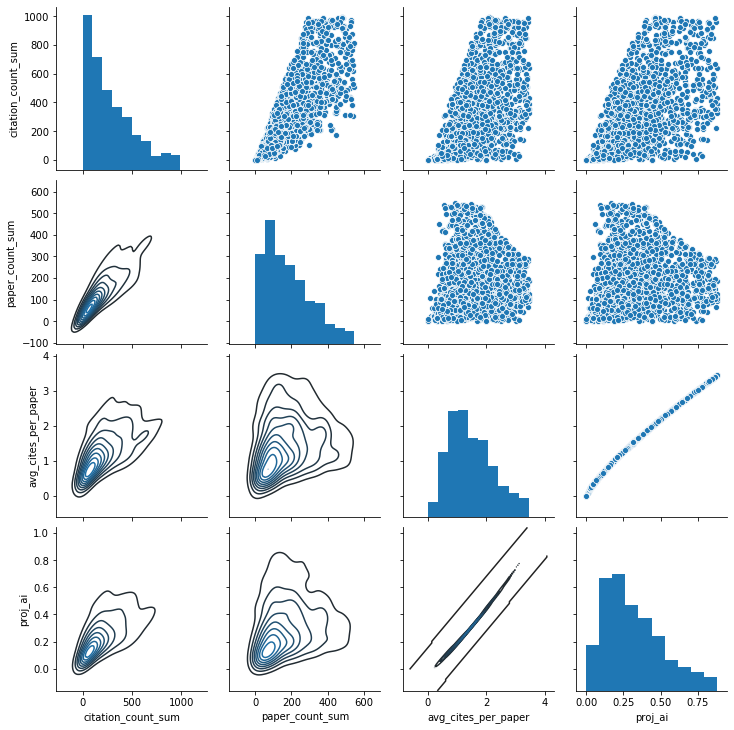

In [23]:
plt.figure(figsize=(12,8))
g = sns.PairGrid(data = articles.drop(['proj_ai_year'], axis = 1))

g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(plt.hist)


In [24]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 3614
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   journal_name         2373 non-null   object 
 1   citation_count_sum   2373 non-null   float64
 2   paper_count_sum      2373 non-null   float64
 3   avg_cites_per_paper  2373 non-null   float64
 4   proj_ai              2373 non-null   float64
 5   proj_ai_year         2373 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 209.8+ KB


In [26]:
articles.describe()

,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
count,2373.000000,2373.000000,2373.000000,2373.000000,2373.0
mean,286.940703,182.552732,1.483957,0.317896,2015.0
std,244.065772,128.110795,0.749818,0.197757,0.0
min,0.000000,1.000000,0.000000,0.000000,2015.0
25%,87.000000,83.000000,0.902439,0.163000,2015.0
50%,219.000000,155.000000,1.360465,0.274000,2015.0
75%,430.000000,261.000000,1.978947,0.438000,2015.0
max,993.000000,547.000000,3.441176,0.879000,2015.0


In [25]:
articles

,journal_name,citation_count_sum,paper_count_sum,avg_cites_per_paper,proj_ai,proj_ai_year
0,3d research,151.0,106.0,1.424528,0.290,2015
3,academic psychiatry,537.0,490.0,1.095918,0.208,2015
4,academic questions,40.0,67.0,0.597015,0.097,2015
5,accreditation and quality assurance,255.0,331.0,0.770393,0.134,2015
6,acoustics australia,30.0,25.0,1.200000,0.234,2015
...,...,...,...,...,...,...
3610,zoologica poloniae,0.0,10.0,0.000000,0.000,2015
3611,zoological studies,381.0,290.0,1.313793,0.262,2015
3612,zoology,472.0,221.0,2.135747,0.483,2015
3613,zoomorphology,191.0,125.0,1.528000,0.317,2015


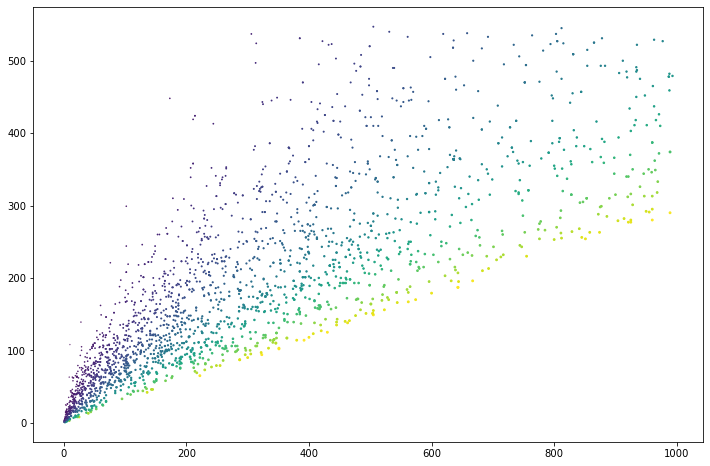

In [27]:
plt.figure(figsize=(12,8))
f1 = articles['citation_count_sum'].values
f2 = articles['paper_count_sum'].values
f3 = articles['avg_cites_per_paper'].values
f4 = articles['proj_ai'].values
X = np.array(list(zip(f1, f2, f3, f4)))
plt.scatter(f1, f2, f3, f4, )
plt.xlim = (0,550)
plt.ylim = (0,1000)

# Cleaning Journals

In [64]:
journals.head(5)

,issn,journal_name,pub_name,is_hybrid,category,url
0,1654-9880,Global Health Action,Co-Action Publishing,0.0,Medicine,NaN
1,2278-9480,International Journal of Applied Research & St...,NaN,0.0,NaN,NaN
2,1980-5918,Fisioterapia Em Movimento,Pontif�cia Universidade Cat�lica do Paran�,0.0,Medicine,http://www.pucpr.br/revfisio
3,1121-760X,European Journal of Histochemistry,NaN,0.0,NaN,NaN
4,2319-5754,Species,Discovery Publication,0.0,NaN,NaN


In [65]:
journals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105496 entries, 0 to 105495
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   issn          105492 non-null  object 
 1   journal_name  105492 non-null  object 
 2   pub_name      93631 non-null   object 
 3   is_hybrid     105496 non-null  float64
 4   category      54743 non-null   object 
 5   url           51095 non-null   object 
dtypes: float64(1), object(5)
memory usage: 4.8+ MB


In [66]:
journals.describe()

,is_hybrid
count,105496.000000
mean,0.135673
std,0.393452
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,10.000000


In [67]:
journals.columns

Index(['issn', 'journal_name', 'pub_name', 'is_hybrid', 'category', 'url'], dtype='object')

In [68]:
# Dropping issn and url columns

journals = journals.drop(['issn','url'], axis = 1)

In [69]:
journals.tail(5)

,journal_name,pub_name,is_hybrid,category
105491,Automatica,Elsevier,0.0,RoBOTiCS
105492,anthropologie58,NaN,0.0,NaN
105493,anthropologie11,NaN,0.0,NaN
105494,anthropologie4,NaN,0.0,NaN
105495,Automatica,Elsevier,0.0,RoBOTiCS


In [70]:
journals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105496 entries, 0 to 105495
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   journal_name  105492 non-null  object 
 1   pub_name      93631 non-null   object 
 2   is_hybrid     105496 non-null  float64
 3   category      54743 non-null   object 
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [71]:
journals['category'].unique()

array(['Medicine', nan, 'Science', 'Education', 'Law', 'Agriculture',
       'Social Sciences', 'General Works',
       'Geography. Anthropology. Recreation',
       'History (General) and history of Europe', 'Technology',
       'Fine Arts', 'Political science', 'Language and Literature',
       'Philosophy. Psychology. Religion',
       'Auxiliary sciences of history', 'Veterinary', 'History America',
       'STRUCTURAL ENGINEERING', 'Anthropology', 'Agriculture | Science',
       'Ecology and Evolution', 'MEDICINE', 'Sports Medicine',
       'Literary Studies', 'Naval Science', 'VETERINARY',
       'Technology | Philosophy. Psychology. Religion', 'Neuroscience',
       'Mathematics', 'ECOLOGY AND EVOLUTION', 'Fine Arts | Science',
       'MOLECULAR AND CELL BIOLOGY', 'Molecular and Cell Biology',
       'Education | Geography. Anthropology. Recreation',
       'Fine Arts | Language and Literature',
       'Geography. Anthropology. Recreation | Science',
       'Education | Medicine'

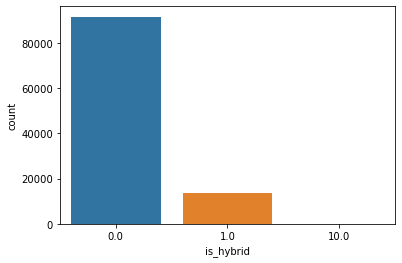

In [72]:
sns.countplot(data=journals, x = 'is_hybrid')

### Dropping wrong values for is_hybrid

In [73]:
journals[journals['category'].isna() == True]

,journal_name,pub_name,is_hybrid,category
1,International Journal of Applied Research & St...,NaN,0.0,NaN
3,European Journal of Histochemistry,NaN,0.0,NaN
4,Species,Discovery Publication,0.0,NaN
6,Journal of Horticulture Letters,BioInfo Publications,0.0,NaN
7,HCTL Open International Journal of Technology ...,NaN,0.0,NaN
...,...,...,...,...
105487,anthropologie56,NaN,0.0,NaN
105488,anthropologie61,NaN,0.0,NaN
105492,anthropologie58,NaN,0.0,NaN
105493,anthropologie11,NaN,0.0,NaN


In [74]:
journals = journals.drop((journals[journals['is_hybrid'] == 10]).index)

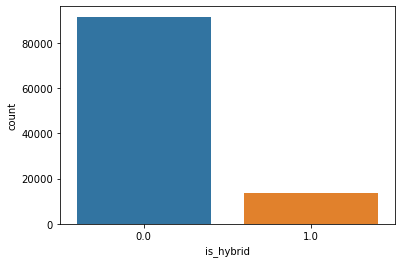

In [75]:
sns.countplot(data=journals, x = 'is_hybrid')

### labeling NaN values for category column as "not specified"

In [94]:
journals['category'].fillna('Not Specified', inplace= True)

In [95]:
journals

,journal_name,pub_name,is_hybrid,category
0,Global Health Action,Co-Action Publishing,0.0,Medicine
1,International Journal of Applied Research & St...,NaN,0.0,Not Specified
2,Fisioterapia Em Movimento,Pontif�cia Universidade Cat�lica do Paran�,0.0,Medicine
3,European Journal of Histochemistry,NaN,0.0,Not Specified
4,Species,Discovery Publication,0.0,Not Specified
...,...,...,...,...
105491,Automatica,Elsevier,0.0,RoBOTiCS
105492,anthropologie58,NaN,0.0,Not Specified
105493,anthropologie11,NaN,0.0,Not Specified
105494,anthropologie4,NaN,0.0,Not Specified


In [99]:
journals['is_hybrid']= journals['is_hybrid'].astype(int)

In [101]:
journals['pub_name'].fillna('Unknown', inplace= True)

# Cleaned Journals

In [102]:
journals

,journal_name,pub_name,is_hybrid,category
0,Global Health Action,Co-Action Publishing,0,Medicine
1,International Journal of Applied Research & St...,Unknown,0,Not Specified
2,Fisioterapia Em Movimento,Pontif�cia Universidade Cat�lica do Paran�,0,Medicine
3,European Journal of Histochemistry,Unknown,0,Not Specified
4,Species,Discovery Publication,0,Not Specified
...,...,...,...,...
105491,Automatica,Elsevier,0,RoBOTiCS
105492,anthropologie58,Unknown,0,Not Specified
105493,anthropologie11,Unknown,0,Not Specified
105494,anthropologie4,Unknown,0,Not Specified


In [103]:
journals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105452 entries, 0 to 105495
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   journal_name  105452 non-null  object
 1   pub_name      105452 non-null  object
 2   is_hybrid     105452 non-null  int32 
 3   category      105452 non-null  object
dtypes: int32(1), object(3)
memory usage: 8.6+ MB


# Cleaning Price

In [104]:
price

,id,price,date_stamp,journal_id,influence_id,url,license
0,8691,1400.0,2016-08-11,2051-5960,NaN,NaN,NaN
1,8692,2175.0,2016-08-11,1758-9193,NaN,NaN,NaN
2,8693,2145.0,2016-08-11,1476-0711,NaN,NaN,NaN
3,8694,2145.0,2016-08-11,2047-2994,NaN,NaN,NaN
4,8695,2145.0,2016-08-11,1744-9081,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7790,16482,80.0,2017-09-30,2456-1908,NaN,http://ijaers.com/payment-option/,9.0
7791,16483,85.0,2017-09-30,2350-0530,NaN,http://granthaalayah.com/Publication_Charges.html,1.0
7792,16484,800.0,2017-10-18,2251-3582,NaN,http://nursing.usp-pl.com/index.php/Nursing,2.0
7793,16485,75.0,2017-10-17,2250-3021,NaN,http://iosrjen.org/pages/faqs.html,10.0


In [105]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7795 non-null   int64  
 1   price         7795 non-null   float64
 2   date_stamp    7795 non-null   object 
 3   journal_id    7795 non-null   object 
 4   influence_id  759 non-null    float64
 5   url           364 non-null    object 
 6   license       378 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 426.4+ KB


In [106]:
price.describe()

,id,price,influence_id,license
count,7795.000000,7795.000000,759.000000,378.000000
mean,12588.002309,1273.908794,4570.260870,3.989418
std,2250.370998,1264.786225,583.092441,3.716034
min,8691.000000,0.000000,209.000000,1.000000
25%,10639.500000,0.000000,4324.500000,1.000000
50%,12588.000000,1000.000000,4571.000000,1.000000
75%,14536.500000,2580.000000,4937.500000,6.000000
max,16486.000000,7590.000000,5516.000000,10.000000


In [107]:
price.dropna(axis = 1, thresh = len(price.index)*0.6, inplace= True)

In [108]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7795 non-null   int64  
 1   price       7795 non-null   float64
 2   date_stamp  7795 non-null   object 
 3   journal_id  7795 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 243.7+ KB


In [109]:
price

,id,price,date_stamp,journal_id
0,8691,1400.0,2016-08-11,2051-5960
1,8692,2175.0,2016-08-11,1758-9193
2,8693,2145.0,2016-08-11,1476-0711
3,8694,2145.0,2016-08-11,2047-2994
4,8695,2145.0,2016-08-11,1744-9081
...,...,...,...,...
7790,16482,80.0,2017-09-30,2456-1908
7791,16483,85.0,2017-09-30,2350-0530
7792,16484,800.0,2017-10-18,2251-3582
7793,16485,75.0,2017-10-17,2250-3021


In [111]:
for i,cost in enumerate(price['price']):
    if int(cost) == 0:
        price['price'][i] = 'FREE'

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python37\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [115]:
price['id'] = price['id'].astype(str)

# Cleaned Price

In [116]:
price

,id,price,date_stamp,journal_id
0,8691,1400,2016-08-11,2051-5960
1,8692,2175,2016-08-11,1758-9193
2,8693,2145,2016-08-11,1476-0711
3,8694,2145,2016-08-11,2047-2994
4,8695,2145,2016-08-11,1744-9081
...,...,...,...,...
7790,16482,80,2017-09-30,2456-1908
7791,16483,85,2017-09-30,2350-0530
7792,16484,800,2017-10-18,2251-3582
7793,16485,75,2017-10-17,2250-3021


In [117]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7795 non-null   object
 1   price       7795 non-null   object
 2   date_stamp  7795 non-null   object
 3   journal_id  7795 non-null   object
dtypes: object(4)
memory usage: 243.7+ KB


In [118]:
price.describe()

,id,price,date_stamp,journal_id
count,7795,7795,7795,7795
unique,7795,527,1472,5720
top,11155,FREE,2016-08-11,0365-0588
freq,1,3008,2666,7
